# 4a: Shortest Path Between Two Stations

How to use: install graph-tool (https://graph-tool.skewed.de/static/docs/stable/quickstart.html)


TODO:
* add dictionary of all stations, mapping number to station name
* add edges once? or in both directions?
* replace example graph with real data


In [2]:
import graph_tool.all as gt

In [3]:
station_dict = {0: "Wedding",
                1: "Gesundbrunnen",
                2: "Tempelhof",
                3: "Südkreuz",
                4: "Mehringdamm",
                5: "Hermannplatz",
                6: "Neukölln",
                7: "Hermannstraße"}

Graph Construction

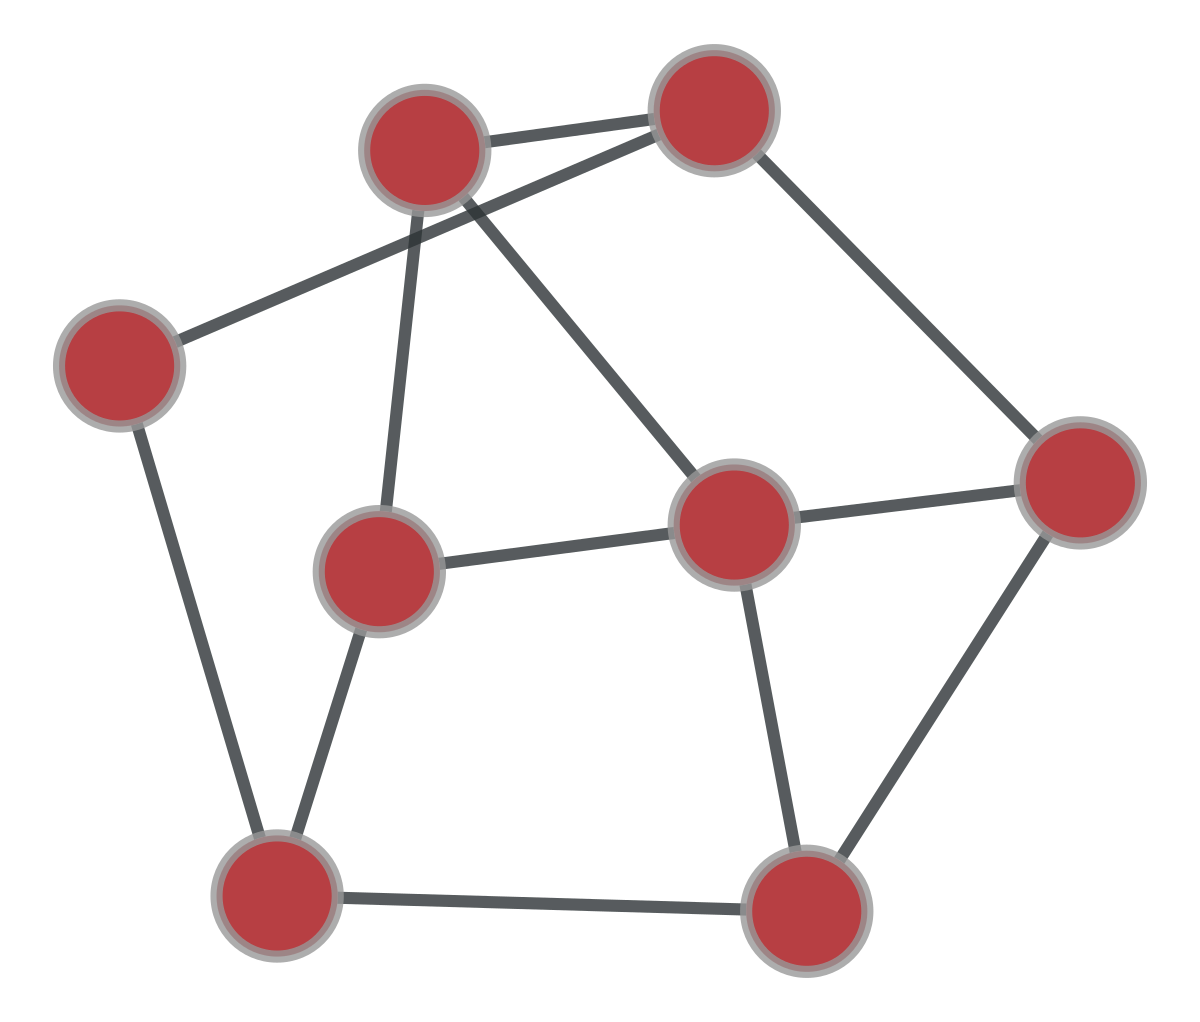

In [4]:
#todo: replace the following graph construction by real s bahn connections
g_stations = gt.Graph({0: [1, 4], 1: [3, 6], 2: [3, 4, 7], 3: [7], 4: [5], 5: [6,7], 6:[7]})


g_stations.set_directed(False)
gt.graph_draw(g_stations)

eweight = g_stations.new_ep("double")    # creates an EdgePropertyMap of type double
vcolor = g_stations.new_vp("string")     # creates a VertexPropertyMap of type string
vname = g_stations.new_vp("string")

for e in g_stations.edges():
    eweight[e] = 1

for v in g_stations.vertices():
    vname[v] = station_dict[v] 

g_stations.ep["weight"] = eweight       # register as graph properties
g_stations.vp["name"] = vname

Implementing Dijkstra's Algorithm using graph-tool

In [5]:
class VisitorExample(gt.DijkstraVisitor):

    def __init__(self, name, time):
        self.name = name
        self.time = time
        self.last_time = 0

    def discover_vertex(self, u):
        print("-->", self.name[u], "has been visited!")
        self.time[u] = self.last_time
        self.last_time += 1

    def examine_edge(self, e):
        print("edge (%s, %s) has been examined..." % \
            (self.name[e.source()], self.name[e.target()]))

    def edge_relaxed(self, e):
        print("edge (%s, %s) has been relaxed..." % \
            (self.name[e.source()], self.name[e.target()]))

In [6]:
# method returning the shortest path using Dijkstra's algorithm
def path_from_to(g, start_index, goal_index): 
    name = g.vp["name"]
    weight = g.ep["weight"]
    time = g.new_vertex_property("int")
    dist, pred = gt.dijkstra_search(g, weight, g.vertex(start_index), VisitorExample(name, time))

    path = [station_dict[goal_index]]
    curr = goal_index

    while curr != start_index:
        path.append(station_dict[pred[curr]])
        curr = pred[curr]

    path.reverse()
    shortest_path = (path, dist[goal_index])
    return shortest_path

### Enter start and goal stations here!

In [7]:
start = 0
goal = 7
path, distance = path_from_to(g_stations, start, goal)
print("Shortest path from ", station_dict[start], " to ", station_dict[goal], " is", path, "with ", int(distance), " transfers.")

--> Wedding has been visited!
edge (Wedding, Gesundbrunnen) has been examined...
edge (Wedding, Gesundbrunnen) has been relaxed...
--> Gesundbrunnen has been visited!
edge (Wedding, Mehringdamm) has been examined...
edge (Wedding, Mehringdamm) has been relaxed...
--> Mehringdamm has been visited!
edge (Gesundbrunnen, Südkreuz) has been examined...
edge (Gesundbrunnen, Südkreuz) has been relaxed...
--> Südkreuz has been visited!
edge (Gesundbrunnen, Neukölln) has been examined...
edge (Gesundbrunnen, Neukölln) has been relaxed...
--> Neukölln has been visited!
edge (Gesundbrunnen, Wedding) has been examined...
edge (Mehringdamm, Hermannplatz) has been examined...
edge (Mehringdamm, Hermannplatz) has been relaxed...
--> Hermannplatz has been visited!
edge (Mehringdamm, Tempelhof) has been examined...
edge (Mehringdamm, Tempelhof) has been relaxed...
--> Tempelhof has been visited!
edge (Mehringdamm, Wedding) has been examined...
edge (Neukölln, Hermannstraße) has been examined...
edge (N